In [1]:
from api_key_store import ApiKeyStore
import os

In [2]:
import pandas as pd
from pandasai import Agent

In [3]:
s = ApiKeyStore()
# By default, unless you choose a different LLM, it will use BambooLLM.
# You can get your free API key signing up at https://pandabi.ai (you can also configure it in your .env file)
os.environ["PANDASAI_API_KEY"] = s.get_api_key(provider="PANDASAI") 

In [4]:
# Sample DataFrame
sales_by_country = pd.DataFrame({
    "country": ["United States", "United Kingdom", "France", "Germany", "Italy", "Spain", "Canada", "Australia", "Japan", "China"],
    "sales": [5000, 3200, 2900, 4100, 2300, 2100, 2500, 2600, 4500, 7000]
})

agent = Agent(sales_by_country)
agent.chat('Which are the top 5 countries by sales?')

'The top 5 countries by sales are: China, United States, Japan, Germany, United Kingdom.'

In [5]:
sales_by_country

,country,sales
0,United States,5000
1,United Kingdom,3200
2,France,2900
3,Germany,4100
4,Italy,2300
5,Spain,2100
6,Canada,2500
7,Australia,2600
8,Japan,4500
9,China,7000


In [10]:
agent.chat(
    "add the sales number for the top 5 countries by sales?"
)

23800

In [11]:
7000 + 5000 + 4500 + 4100 + 3200

23800

In [8]:
agent.chat(
    "Sort the country by sales in descending order"
)

,country,sales
9,China,7000
0,United States,5000
8,Japan,4500
3,Germany,4100
1,United Kingdom,3200
2,France,2900
7,Australia,2600
6,Canada,2500
4,Italy,2300
5,Spain,2100


above answer is wrong

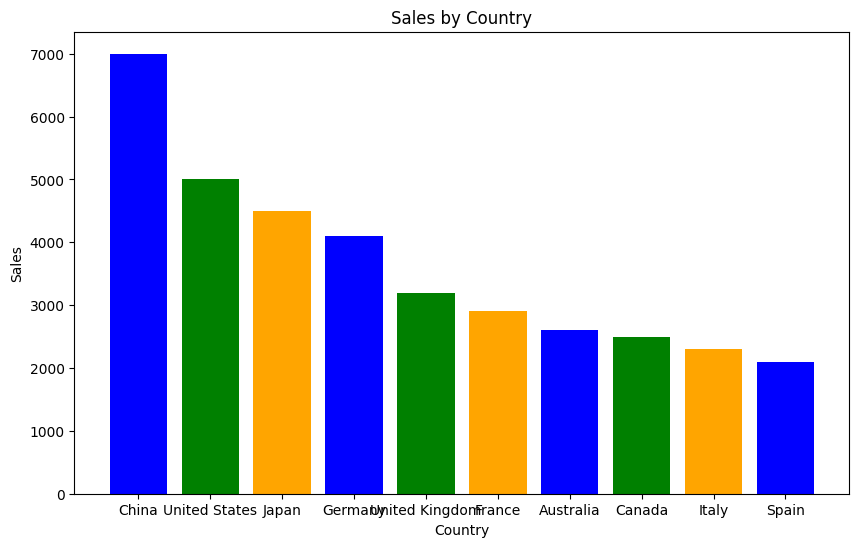

Traceback (most recent call last):
  File "/home/papagame/.local/lib/python3.10/site-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 307, in run
    output = (self.code_generation_pipeline | self.code_execution_pipeline).run(
  File "/home/papagame/.local/lib/python3.10/site-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/home/papagame/.local/lib/python3.10/site-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
  File "/home/papagame/.local/lib/python3.10/site-packages/pandasai/pipelines/chat/code_execution.py", line 133, in execute
    {"content_type": "response", "value": ResponseSerializer.serialize(result)},
  File "/home/papagame/.local/lib/python3.10/site-packages/pandasai/responses/response_serializer.py", line 35, in serialize
    with open(result["value"], "rb") as image_file:
FileNotFoundError: [Errno 2] No such file or directory: '/home/papagame/projects/wgong/py4kids/lesson-18-ai/pan

"Unfortunately, I was not able to answer your question, because of the following error:\n\n[Errno 2] No such file or directory: '/home/papagame/projects/wgong/py4kids/lesson-18-ai/pandasai/exports/charts/temp_chart.png'\n"

In [9]:
agent.chat("""
First, Sort the country by sales in descending order;
Then, Plot the histogram of countries showing for each the gdp, using different colors for each bar
"""
)